# Análise de Correspondência Simples e Múltipla

MBA em Data Science e Analytics USP ESALQ

Prof. Dr. Wilson Tarantin Junior

-*- coding: utf-8 -*-

In [1]:
# Instalando os pacotes.

# !pip install pandas
# !pip install numpy
# !pip install scipy
# !pip install plotly
# !pip install seaborn
# !pip install matplotlib
# !pip install statsmodels
# !pip install prince

In [2]:
# Importando os pacotes necessários.

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.io as pio
import plotly.graph_objects as go

In [3]:
# Importando o banco de dados.

url = 'https://github.com/filipecarbonera/MBA_USP_Data_Science_Analytics/raw/main/An%C3%A1lise%20de%20Correspond%C3%AAncia%20Simples%20e%20M%C3%BAltipla/perfil_aplicacao_civil.xlsx'
# Fonte: Fávero e Belfiore (2024, Capítulo 11)

perfil_mca = pd.read_excel(url)
perfil_mca.head()

,estudante,perfil,aplicacao,estado.civil
0,Gabriela,Conservador,Poupanca,Casado
1,Luiz Felipe,Conservador,Poupanca,Casado
2,Patrícia,Conservador,Poupanca,Casado
3,Gustavo,Conservador,Poupanca,Solteiro
4,Letícia,Conservador,Poupanca,Casado


In [4]:
# Selecionando apenas as variáveis que farão parte da análise.
dados_mca = perfil_mca.drop(columns=['estudante'])
dados_mca.head()

,perfil,aplicacao,estado.civil
0,Conservador,Poupanca,Casado
1,Conservador,Poupanca,Casado
2,Conservador,Poupanca,Casado
3,Conservador,Poupanca,Solteiro
4,Conservador,Poupanca,Casado


In [5]:
# Informações descritivas sobre as variáveis.
print(dados_mca['perfil'].value_counts(),"\n")
print(dados_mca['aplicacao'].value_counts(),"\n")
print(dados_mca['estado.civil'].value_counts())

perfil
Agressivo      58
Moderado       25
Conservador    17
Name: count, dtype: int64 

aplicacao
Acoes       45
CDB         40
Poupanca    15
Name: count, dtype: int64 

estado.civil
Solteiro    57
Casado      43
Name: count, dtype: int64


In [6]:
# Analisando as tabelas de contingência.

tabela_mca_1 = pd.crosstab(dados_mca["perfil"], dados_mca["aplicacao"])
tabela_mca_2 = pd.crosstab(dados_mca["perfil"], dados_mca["estado.civil"])
tabela_mca_3 = pd.crosstab(dados_mca["aplicacao"], dados_mca["estado.civil"])

print("Perfil/Aplicação:\n", tabela_mca_1,"\n")
print("Perfil/Estado Civil:\n", tabela_mca_2,"\n")
print("Aplicação/Estado Civil:\n", tabela_mca_3)

Perfil/Aplicação:
 aplicacao    Acoes  CDB  Poupanca
perfil                           
Agressivo       36   20         2
Conservador      5    4         8
Moderado         4   16         5 

Perfil/Estado Civil:
 estado.civil  Casado  Solteiro
perfil                        
Agressivo         17        41
Conservador       12         5
Moderado          14        11 

Aplicação/Estado Civil:
 estado.civil  Casado  Solteiro
aplicacao                     
Acoes              9        36
CDB               24        16
Poupanca          10         5


In [10]:
# Analisando a significância estatística das associações (teste qui²).

tab_1 = chi2_contingency(tabela_mca_1)

print("Associação Perfil x Aplicação:")
print(f"estatística qui²: {round(tab_1[0], 2)}")
print(f"p-valor da estatística: {round(tab_1[1], 4)}")
print(f"graus de liberdade: {tab_1[2]}")

tab_2 = chi2_contingency(tabela_mca_2)

print("\nAssociação Perfil x Estado Civil:")
print(f"estatística qui²: {round(tab_2[0], 2)}")
print(f"p-valor da estatística: {round(tab_2[1], 4)}")
print(f"graus de liberdade: {tab_2[2]}")

tab_3 = chi2_contingency(tabela_mca_3)

print("\nAssociação Aplicação x Estado Civil:")
print(f"estatística qui²: {round(tab_3[0], 2)}")
print(f"p-valor da estatística: {round(tab_3[1], 4)}")
print(f"graus de liberdade: {tab_3[2]}")

Associação Perfil x Aplicação:
estatística qui²: 31.76
p-valor da estatística: 0.0
graus de liberdade: 4

Associação Perfil x Estado Civil:
estatística qui²: 11.44
p-valor da estatística: 0.0033
graus de liberdade: 2

Associação Aplicação x Estado Civil:
estatística qui²: 17.86
p-valor da estatística: 0.0001
graus de liberdade: 2


In [12]:
# Elaborando a MCA.
mca = prince.MCA(n_components=2).fit(dados_mca)

# Vamos parametrizar a MCA para duas dimensões (eixos X e Y no mapa perceptual).
# Note que o input é o próprio banco de dados com as variáveis categóricas.

In [14]:
# Quantidade total de dimensões.
# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias.
mca.J_

# Quantidade de variáveis na análise.
mca.K_

# Quantidade de dimensões.
quant_dim = mca.J_ - mca.K_

# Resumo das informações.
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 8
quantidade de variáveis: 3
quantidade de dimensões: 5


In [17]:
#  Visualizando as matrizes: binária e Burt.

binaria = pd.get_dummies(dados_mca, columns=dados_mca.columns, dtype=float)
burt = np.matmul(np.transpose(binaria), binaria)

# Nota: esta célula não é requerida para a função, tem fins didáticos!

In [18]:
# Obtendo os eigenvalues.
tabela_autovalores = mca.eigenvalues_summary

tabela_autovalores

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.602,36.14%,36.14%
1,0.436,26.16%,62.30%


In [19]:
# Inércia principal total.
mca.total_inertia_ # Soma de todos os autovalores (todas as dimensões existentes).

1.6666666666666645

In [20]:
# Obtendo as coordenadas principais das categorias das variáveis.
coord_burt = mca.column_coordinates(dados_mca)
coord_burt

,0,1
perfil_Agressivo,-0.653069,-0.014732
perfil_Conservador,1.129970,1.483614
perfil_Moderado,0.746741,-0.974679
aplicacao_Acoes,-0.831258,0.387515
aplicacao_CDB,0.417184,-0.935143
aplicacao_Poupanca,1.381285,1.331169
estado.civil_Casado,0.843172,-0.131145
estado.civil_Solteiro,-0.636077,0.098934


In [21]:
# Obtendo as coordenadas-padrão das categorias das variáveis.
coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

coord_padrao

,0,1
perfil_Agressivo,-0.841494,-0.022312
perfil_Conservador,1.455992,2.246900
perfil_Moderado,0.962193,-1.476129
aplicacao_Acoes,-1.071095,0.586883
aplicacao_CDB,0.537550,-1.416253
aplicacao_Poupanca,1.779816,2.016026
estado.civil_Casado,1.086446,-0.198617
estado.civil_Solteiro,-0.819599,0.149834


In [23]:
# Obtendo as coordenadas das observações do banco de dados.
coord_obs = mca.row_coordinates(dados_mca) # Na função, as coordenadas das observações vêm das coordenadas-padrão.

coord_obs.head()

,0,1
0,1.440751,1.35477
1,1.440751,1.35477
2,1.440751,1.35477
3,0.805403,1.47092
4,1.440751,1.35477


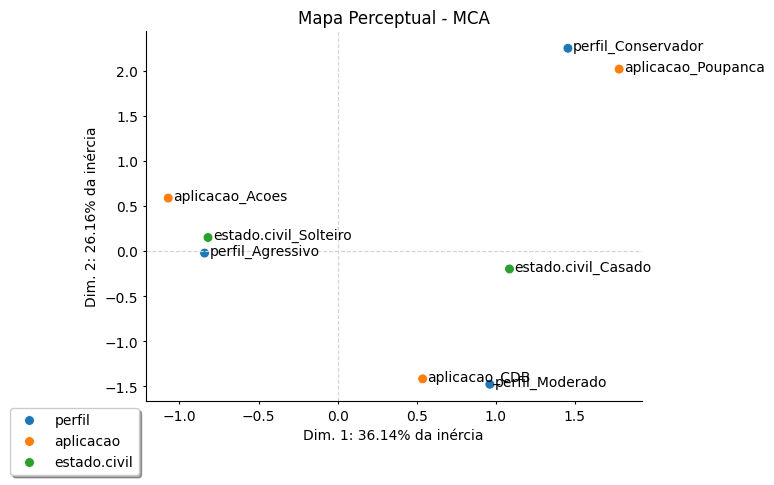

In [29]:
# Plotando o mapa perceptual (coordenadas-padrão).

chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
# Nota: para a função acima ser executada adequadamente, não deixar underline no nome original da variável no dataset.

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=10)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=50)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=10)
plt.legend(bbox_to_anchor=(0,0), fancybox=True, shadow=True, fontsize = 10)
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=10)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=10)
plt.show()